# **8. Prediccion de Overall Survival Status - Modelo de Clasificación**
---


 

In [551]:
df_clasf.head(3)

,Age at Diagnosis,Type of Breast Surgery,Cellularity,Chemotherapy,ER Status,Neoplasm Histologic Grade,HER2 Status,Hormone Therapy,Inferred Menopausal State,Primary Tumor Laterality,...,Radio Therapy,Relapse Free Status (Months),Tumor Size,Tumor Stage,Oncotree Code_Otros,Pam50 + Claudin-low subtype_LumB,Pam50 + Claudin-low subtype_Otros,Pam50 + Claudin-low subtype_claudin-low,Risk Index,Aggressive Treatment Score
0,75,1,2,0,1,3,0,1,1,1,...,1,138,22,2,False,False,False,True,12,3
1,43,0,2,0,1,3,0,1,0,1,...,1,83,10,1,False,False,False,False,4,2
2,48,1,2,1,1,2,0,1,0,1,...,0,151,15,2,False,True,False,False,8,3


In [552]:
df_clasf.dtypes;

In [705]:
df_clasf.columns;

In [554]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

**RANDOM FOREST CLASIFIER**

In [657]:
df_clasf[['Aggressive Treatment Score', 'Risk Index', 'Hormone Therapy',
    'Chemotherapy', 'Tumor Stage',
    'ER Status', 'Age at Diagnosis', 'HER2 Status', 'Tumor Size','Relapse Free Status (Months)']].describe()

,Aggressive Treatment Score,Risk Index,Hormone Therapy,Chemotherapy,Tumor Stage,ER Status,Age at Diagnosis,HER2 Status,Tumor Size,Relapse Free Status (Months)
count,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000
mean,2.180757,7.236715,0.696457,0.160628,1.767311,0.744767,59.990741,0.097424,26.896135,108.544283
std,0.848072,3.980966,0.459880,0.367261,0.682178,0.436080,12.972985,0.296593,13.836034,74.539883
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,1.000000,0.000000
25%,2.000000,4.000000,0.000000,0.000000,1.000000,0.000000,50.000000,0.000000,17.000000,43.000000
50%,2.000000,8.000000,1.000000,0.000000,2.000000,1.000000,61.000000,0.000000,23.500000,98.000000
75%,3.000000,10.000000,1.000000,0.000000,2.000000,1.000000,70.000000,0.000000,31.000000,163.000000
max,4.000000,24.000000,1.000000,1.000000,4.000000,1.000000,96.000000,1.000000,90.000000,384.000000


In [556]:
df_clasf.columns

Index(['Age at Diagnosis', 'Type of Breast Surgery', 'Cellularity',
       'Chemotherapy', 'ER Status', 'Neoplasm Histologic Grade', 'HER2 Status',
       'Hormone Therapy', 'Inferred Menopausal State',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Tumor Size',
       'Tumor Stage', 'Oncotree Code_Otros',
       'Pam50 + Claudin-low subtype_LumB', 'Pam50 + Claudin-low subtype_Otros',
       'Pam50 + Claudin-low subtype_claudin-low', 'Risk Index',
       'Aggressive Treatment Score'],
      dtype='object')

In [775]:
# Variables a eliminar
var_elim_clasf = [
      'Cellularity', 'Chemotherapy', 'ER Status',
    'Neoplasm Histologic Grade', 'HER2 Status', 'Hormone Therapy',
    'Inferred Menopausal State', 'Primary Tumor Laterality',
    'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
    'Radio Therapy', 'Oncotree Code_Otros', 'Pam50 + Claudin-low subtype_LumB',
    'Pam50 + Claudin-low subtype_Otros', 'Pam50 + Claudin-low subtype_claudin-low',
    'Risk Index']

# Cargar datos y preprocesamiento inicial
X = df_clasf.drop(columns=variables_a_eliminar, errors="ignore")
y = df_clasf["Overall Survival Status"]


# Seleccionar solo las 10 variables especificadas para el entrenamiento
feature_selected_clasf = [
    'Relapse Free Status (Months)',
    'Age at Diagnosis', 'Tumor Size', 'Mutation Count',
    'Aggressive Treatment Score', 'Nottingham prognostic index',
    'Lymph nodes examined positive', 'Type of Breast Surgery',
    'Tumor Stage'
]

X = X[feature_selected_clasf]  # Filtrar solo las variables deseadas

# 🔹 4️⃣ División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 5️⃣ Crear el Pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),  
    ("classifier", RandomForestClassifier(random_state=42))  # Modelo de clasificación
])

# 🔹 6️⃣ Definir los hiperparámetros a optimizar en GridSearchCV
param_grid = {
    "classifier__n_estimators": [120],
    "classifier__max_depth": [None, 10, 20, 30],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4],
    "classifier__bootstrap": [True, False],
    "classifier__max_features": ["sqrt", 3, 4] 
}

# Ejecutar GridSearchCV con el pipeline
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring="roc_auc",
    verbose=2
)

grid_search.fit(X_train, y_train)

# Evaluar el modelo con los mejores hiperparámetros
best_model_rfc = grid_search.best_estimator_

y_pred_best = best_model_rfc.predict(X_test)
y_prob_best_rfc = best_model_rfc.predict_proba(X_test)[:, 1]
accuracy_best = accuracy_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best, output_dict=True)

# Crear un DataFrame con los resultados de evaluación del modelo
results_rfc = pd.DataFrame({
    "Métrica": ["Accuracy", "F1-Score", "ROC-AUC"],
    "Valor": [accuracy_best, f1_best, roc_auc_best]
})

# Convertir el classification_report en un DataFrame
report_rfc = pd.DataFrame(report_best).transpose()




Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [774]:
results_rfc

,Métrica,Valor
0,Accuracy,0.754527
1,F1-Score,0.782143
2,ROC-AUC,0.749193


In [761]:
report_rfc

,precision,recall,f1-score,support
0,0.760976,0.681223,0.718894,229.000000
1,0.750000,0.817164,0.782143,268.000000
accuracy,0.754527,0.754527,0.754527,0.754527
macro avg,0.755488,0.749193,0.750518,497.000000
weighted avg,0.755057,0.754527,0.753000,497.000000


In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_prob_best_rfc)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="lower right")



conf_matrix = confusion_matrix(y_test, y_pred_rfc)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Sobrevivió", "Sobrevivió"], yticklabels=["No Sobrevivió", "Sobrevivió"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")

Guardamos los datasets entrenados y utilizados como tests:

In [561]:
X_train.to_csv("X_train_clasf.csv", index=False)
X_test.to_csv("X_test_clasf.csv", index=False)
y_train.to_csv("y_train_clasf.csv", index=False)
y_test.to_csv("y_test_clasf.csv", index=False)

print("Archivos guardados exitosamente como X_train_clasf.csv, X_test_clasf.csv, y_train_clasf.csv y y_test_clasf.csv")

Archivos guardados exitosamente como X_train_clasf.csv, X_test_clasf.csv, y_train_clasf.csv y y_test_clasf.csv


Guradamos el archivo PKL con el modelo:

In [562]:
import pickle


# Guardar el modelo de clasificación
with open("random_forest_classifier.pkl", "wb") as file:
    pickle.dump(best_model_rfc, file)

print("✅ Modelos guardados correctamente.")


✅ Modelos guardados correctamente.


In [706]:
feature_importances = best_model_rfc.named_steps["classifier"].feature_importances_
importance_df = pd.DataFrame({"Feature": feature_selected_clasf, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)
importance_df;

### Quiero probar el modelo: lo haremos con datos de paceintes de alto riesgo y pacientes de bajor riesgo

In [757]:
import pandas as pd

# Definir las características esperadas
features_selected = [
    'Relapse Free Status (Months)', 'Age at Diagnosis', 'Tumor Size', 
    'Mutation Count', 'Aggressive Treatment Score', 'Nottingham prognostic index', 
    'Lymph nodes examined positive', 'Type of Breast Surgery', 'Tumor Stage'
]

# Crear un nuevo paciente con datos de ejemplo (cambia los valores según sea necesario)
new_sample = pd.DataFrame([{
    'Relapse Free Status (Months)': 36,
    'Age at Diagnosis': 55,
    'Tumor Size': 2.5,
    'Mutation Count': 10,
    'Aggressive Treatment Score': 3,
    'Nottingham prognostic index': 4.2,
    'Lymph nodes examined positive': 2,
    'Type of Breast Surgery': 1,  # Suponiendo que 1 = Mastectomía, 0 = Lumpectomía
    'Tumor Stage': 2
}])

# Asegurarse de que el DataFrame tiene las mismas columnas en el mismo orden
new_sample = new_sample[features_selected]

# Hacer la predicción con el modelo optimizado
y_pred_new = best_model_rfc.predict(new_sample)
y_proba_new = best_model_rfc.predict_proba(new_sample)[:, 1]  # Probabilidad de clase positiva

# Mostrar la predicción
print(f"Predicción de clase: {y_pred_new[0]}")
print(f"Probabilidad de recaída: {y_proba_new[0]:.4f}")


Predicción de clase: 1
Probabilidad de recaída: 0.7649


In [758]:

features_selected = [
    'Relapse Free Status (Months)', 'Age at Diagnosis', 'Tumor Size', 
    'Mutation Count', 'Aggressive Treatment Score', 'Nottingham prognostic index', 
    'Lymph nodes examined positive', 'Type of Breast Surgery', 'Tumor Stage'
]

# Generar datos para 5 pacientes High Risk
high_risk_patients = pd.DataFrame({
    'Relapse Free Status (Months)': np.random.randint(6, 24, size=5),  
    'Age at Diagnosis': np.random.randint(61, 80, size=5),
    'Tumor Size': np.random.uniform(5.1, 10.0, size=5),
    'Mutation Count': np.random.randint(51, 150, size=5),
    'Aggressive Treatment Score': np.random.randint(3, 5, size=5),
    'Nottingham prognostic index': np.random.uniform(5.1, 7.5, size=5),
    'Lymph nodes examined positive': np.random.randint(5, 15, size=5),
    'Type of Breast Surgery': np.random.choice([0, 1], size=5), 
    'Tumor Stage': np.random.randint(3, 4, size=5)  
})

# Generar datos para 5 pacientes Low Risk
low_risk_patients = pd.DataFrame({
    'Relapse Free Status (Months)': np.random.randint(36, 120, size=5),  #
    'Age at Diagnosis': np.random.randint(30, 50, size=5),
    'Tumor Size': np.random.uniform(0.5, 2.0, size=5),
    'Mutation Count': np.random.randint(1, 10, size=5),
    'Aggressive Treatment Score': np.random.randint(0, 2, size=5),
    'Nottingham prognostic index': np.random.uniform(2.0, 3.5, size=5),
    'Lymph nodes examined positive': np.random.randint(0, 2, size=5),
    'Type of Breast Surgery': np.random.choice([0, 1], size=5),  
    'Tumor Stage': np.random.randint(1, 2, size=5)  
})

# Combinar ambos grupos
synthetic_patients = pd.concat([high_risk_patients, low_risk_patients], ignore_index=True)

# Asegurar el orden correcto de las características
synthetic_patients = synthetic_patients[features_selected]

# Hacer predicciones con el modelo optimizado
y_pred = best_model_rfc.predict(synthetic_patients)
y_proba = best_model_rfc.predict_proba(synthetic_patients)[:, 1] 

# Agregar predicciones al DataFrame
synthetic_patients['Predicted Class'] = y_pred
synthetic_patients['Recurrence Probability'] = y_proba

# Mostrar los resultados
synthetic_patients


,Relapse Free Status (Months),Age at Diagnosis,Tumor Size,Mutation Count,Aggressive Treatment Score,Nottingham prognostic index,Lymph nodes examined positive,Type of Breast Surgery,Tumor Stage,Predicted Class,Recurrence Probability
0,15,69,6.474416,107,4,5.317021,8,0,3,0,0.150821
1,15,64,9.870800,77,3,6.984318,8,0,3,0,0.231064
2,12,76,6.091419,71,3,5.208804,10,0,3,0,0.169189
3,23,65,6.668109,132,4,5.452006,8,0,3,0,0.262110
4,12,77,7.981325,81,4,6.401059,11,1,3,0,0.173961
5,55,33,0.807608,1,1,3.037803,1,1,1,1,0.727564
6,44,30,1.883127,5,0,3.099541,1,0,1,0,0.477631
7,90,45,1.663948,9,0,3.427660,0,1,1,1,0.671393
8,99,38,1.436088,2,0,2.174124,1,1,1,1,0.618397
9,55,47,0.586928,6,1,3.296422,0,0,1,1,0.655628


**XGBOOST**

In [676]:
from xgboost import XGBClassifier

In [677]:

pipeline_xgb = Pipeline([
    ("scaler", StandardScaler()),  
    ("classifier", XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42))  
])


param_grid_xgb = {
    "classifier__n_estimators": [100, 200, 300],
    "classifier__max_depth": [3, 5, 7, 10],
    "classifier__learning_rate": [0.01, 0.1, 0.2],
    "classifier__subsample": [0.8, 1.0],
    "classifier__colsample_bytree": [0.8, 1.0]
    
}


grid_search_xgb = GridSearchCV(
    estimator=pipeline_xgb,
    param_grid=param_grid_xgb,
    cv=5,
    n_jobs=-1,
    scoring="roc_auc",
    verbose=2
)


grid_search_xgb.fit(X_train, y_train)
best_model_xgb = grid_search_xgb.best_estimator_


y_pred_xgb = best_model_xgb.predict(X_test)
y_prob_best_xgb = best_model_xgb.predict_proba(X_test)[:, 1]
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)

# 🔹 6️⃣ Crear un DataFrame con los resultados de evaluación del modelo
results_xgb = pd.DataFrame({
    "Métrica": ["Accuracy", "F1-Score", "ROC-AUC"],
    "Valor": [accuracy_xgb, f1_xgb, roc_auc_xgb]
})

# 🔹 7️⃣ Convertir el classification_report en un DataFrame
report_xgb = pd.DataFrame(report_xgb).transpose()



Fitting 5 folds for each of 144 candidates, totalling 720 fits


C:\Users\JUTHA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
C:\Users\JUTHA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:42:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [733]:
results_xgb

,Métrica,Valor
0,Accuracy,0.758551
1,F1-Score,0.785714
2,ROC-AUC,0.753243


In [686]:
report_xgb

,precision,recall,f1-score,support
0,0.765854,0.685590,0.723502,229.000000
1,0.753425,0.820896,0.785714,268.000000
accuracy,0.758551,0.758551,0.758551,0.758551
macro avg,0.759639,0.753243,0.754608,497.000000
weighted avg,0.759152,0.758551,0.757049,497.000000


Text(0.5, 1.0, 'Matriz de Confusión')

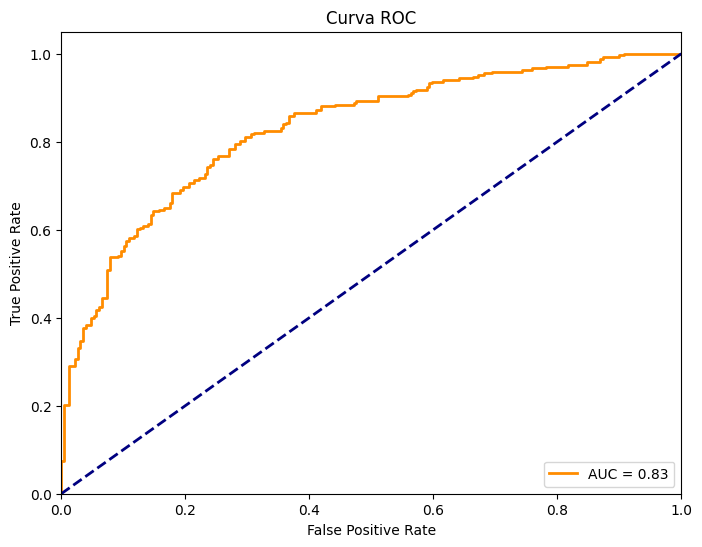

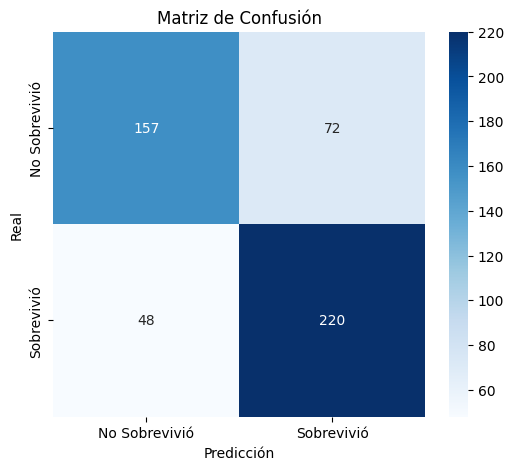

In [689]:

fpr, tpr, _ = roc_curve(y_test, y_prob_best_xgb)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="lower right")



conf_matrix = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Sobrevivió", "Sobrevivió"], yticklabels=["No Sobrevivió", "Sobrevivió"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")


In [681]:
import pickle


# Guardar el modelo de clasificación
with open("xgb_classifier.pkl", "wb") as file:
    pickle.dump(best_model_xgb, file)

print("✅ Modelos guardados correctamente.")

✅ Modelos guardados correctamente.


**SVM**

In [741]:
from sklearn.svm import SVC

In [742]:
pipeline_svm = Pipeline([
    ("scaler", StandardScaler()),  
    ("classifier", SVC(probability=True, random_state=42)) 
])

param_grid_svm = {
    "classifier__C": [0.1, 1, 10, 100],  
    "classifier__kernel": ["linear", "rbf", "poly"],  
    "classifier__gamma": ["scale", "auto"]  
}

grid_search_svm = GridSearchCV(
    estimator=pipeline_svm,
    param_grid=param_grid_svm,
    cv=5,
    n_jobs=-1,
    scoring="roc_auc",
    verbose=2
)

grid_search_svm.fit(X_train, y_train)
best_model_svm = grid_search_svm.best_estimator_

y_pred_svm = best_model_svm.predict(X_test)
y_prob_best_svm = best_model_svm.predict_proba(X_test)[:, 1]
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)

results_svm = pd.DataFrame({
    "Métrica": ["Accuracy", "F1-Score", "ROC-AUC"],
    "Valor": [accuracy_svm, f1_svm, roc_auc_svm]
})

report_svm = pd.DataFrame(report_svm).transpose()


Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [766]:
results_svm

,Métrica,Valor
0,Accuracy,0.764588
1,F1-Score,0.787659
2,ROC-AUC,0.760746


In [767]:
report_svm

,precision,recall,f1-score,support
0,0.761682,0.711790,0.735892,229.000000
1,0.766784,0.809701,0.787659,268.000000
accuracy,0.764588,0.764588,0.764588,0.764588
macro avg,0.764233,0.760746,0.761775,497.000000
weighted avg,0.764434,0.764588,0.763806,497.000000


Text(0.5, 1.0, 'Matriz de Confusión')

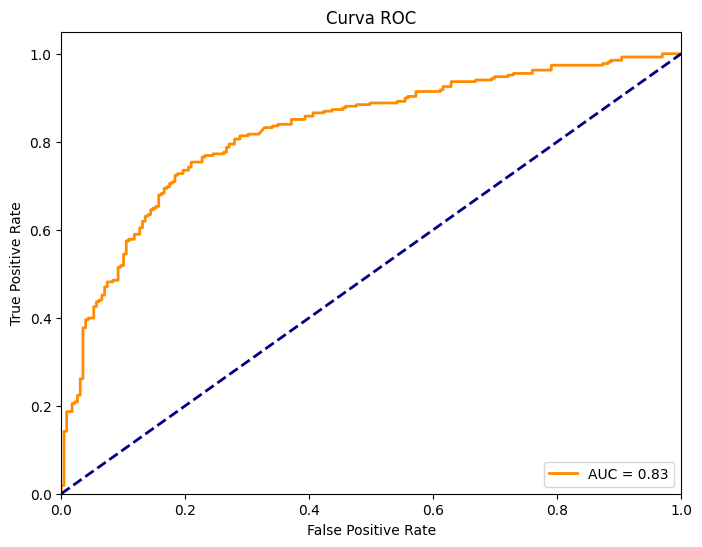

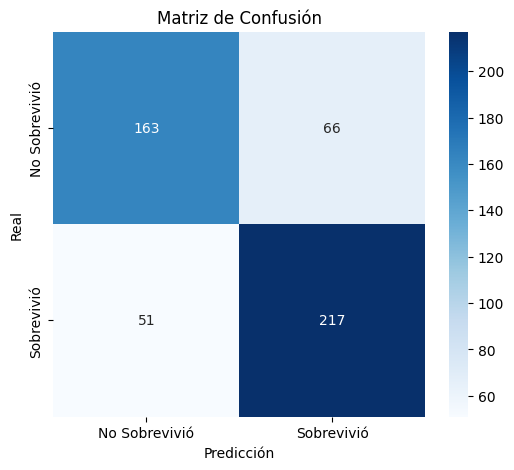

In [768]:
fpr, tpr, _ = roc_curve(y_test, y_prob_best_svm)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="lower right")



conf_matrix = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Sobrevivió", "Sobrevivió"], yticklabels=["No Sobrevivió", "Sobrevivió"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")

In [577]:
import pickle


# Guardar el modelo de clasificación
with open("svm_classifier.pkl", "wb") as file:
    pickle.dump(best_model_svm, file)

print("✅ Modelos guardados correctamente.")

✅ Modelos guardados correctamente.


Probamos con 5 pacientes de bajo riesgo y 5 de alto riesgo

In [773]:
features_selected = [
    'Relapse Free Status (Months)', 'Age at Diagnosis', 'Tumor Size', 
    'Mutation Count', 'Aggressive Treatment Score', 'Nottingham prognostic index', 
    'Lymph nodes examined positive', 'Type of Breast Surgery', 'Tumor Stage'
]

# Generar datos para 5 pacientes High Risk
high_risk_patients = pd.DataFrame({
    'Relapse Free Status (Months)': np.random.randint(6, 24, size=5),  
    'Age at Diagnosis': np.random.randint(61, 80, size=5),
    'Tumor Size': np.random.uniform(5.1, 10.0, size=5),
    'Mutation Count': np.random.randint(51, 150, size=5),
    'Aggressive Treatment Score': np.random.randint(3, 5, size=5),
    'Nottingham prognostic index': np.random.uniform(5.1, 7.5, size=5),
    'Lymph nodes examined positive': np.random.randint(5, 15, size=5),
    'Type of Breast Surgery': np.random.choice([0, 1], size=5), 
    'Tumor Stage': np.random.randint(3, 4, size=5)  
})

# Generar datos para 5 pacientes Low Risk
low_risk_patients = pd.DataFrame({
    'Relapse Free Status (Months)': np.random.randint(36, 120, size=5),  #
    'Age at Diagnosis': np.random.randint(30, 50, size=5),
    'Tumor Size': np.random.uniform(0.5, 2.0, size=5),
    'Mutation Count': np.random.randint(1, 10, size=5),
    'Aggressive Treatment Score': np.random.randint(0, 2, size=5),
    'Nottingham prognostic index': np.random.uniform(2.0, 3.5, size=5),
    'Lymph nodes examined positive': np.random.randint(0, 2, size=5),
    'Type of Breast Surgery': np.random.choice([0, 1], size=5),  
    'Tumor Stage': np.random.randint(1, 2, size=5)  
})

# Combinar ambos grupos
synthetic_patients = pd.concat([high_risk_patients, low_risk_patients], ignore_index=True)

# Asegurar el orden correcto de las características
synthetic_patients = synthetic_patients[features_selected]

# Hacer predicciones con el modelo optimizado
y_pred = best_model_svm.predict(synthetic_patients)
y_proba = best_model_svm.predict_proba(synthetic_patients)[:, 1] 

# Agregar predicciones al DataFrame
synthetic_patients['Predicted Class'] = y_pred
synthetic_patients['Recurrence Probability'] = y_proba

# Mostrar los resultados
synthetic_patients

,Relapse Free Status (Months),Age at Diagnosis,Tumor Size,Mutation Count,Aggressive Treatment Score,Nottingham prognostic index,Lymph nodes examined positive,Type of Breast Surgery,Tumor Stage,Predicted Class,Recurrence Probability
0,20,71,7.491087,64,3,6.699183,9,0,3,0,0.500000
1,23,61,8.729139,137,3,6.457503,14,1,3,0,0.500000
2,20,76,6.456655,54,4,6.052969,10,1,3,0,0.500000
3,21,65,5.530763,53,4,5.899387,13,1,3,0,0.500000
4,22,65,6.043203,75,3,5.498606,8,1,3,0,0.500000
5,91,40,1.095640,4,0,3.157579,0,0,1,1,0.608215
6,58,39,0.922039,6,1,2.846223,0,1,1,1,0.573176
7,92,42,0.921725,4,1,2.183933,0,1,1,1,0.718947
8,36,31,1.880955,3,1,2.058089,1,0,1,1,0.564512
9,103,41,0.945863,2,1,2.638280,0,0,1,1,0.826175


**REGRESION LOGISTICA**

In [578]:
from sklearn.linear_model import LogisticRegression


In [579]:
pipeline_lr = Pipeline([
    ("scaler", StandardScaler()),  
    ("classifier", LogisticRegression(solver='liblinear', random_state=42))  # Solver para conjuntos de datos pequeños/medianos
])

param_grid_lr = {
    "classifier__C": [0.01, 0.1, 1, 10, 100],  # Regularización
    "classifier__penalty": ["l1", "l2"]  # Tipos de penalización
}

grid_search_lr = GridSearchCV(
    estimator=pipeline_lr,
    param_grid=param_grid_lr,
    cv=5,
    n_jobs=-1,
    scoring="roc_auc",
    verbose=2
)

grid_search_lr.fit(X_train, y_train)

best_model_lr = grid_search_lr.best_estimator_

y_pred_lr = best_model_lr.predict(X_test)
y_prob_best_lr = best_model_lr.predict_proba(X_test)[:, 1]
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)

results_lr = pd.DataFrame({
    "Métrica": ["Accuracy", "F1-Score", "ROC-AUC"],
    "Valor": [accuracy_lr, f1_lr, roc_auc_lr]
})

report_lr = pd.DataFrame(report_lr).transpose()


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [580]:
results_lr

,Métrica,Valor
0,Accuracy,0.718310
1,F1-Score,0.750890
2,ROC-AUC,0.712434


In [581]:
report_lr

,precision,recall,f1-score,support
0,0.719212,0.637555,0.675926,229.00000
1,0.717687,0.787313,0.750890,268.00000
accuracy,0.718310,0.718310,0.718310,0.71831
macro avg,0.718449,0.712434,0.713408,497.00000
weighted avg,0.718390,0.718310,0.716349,497.00000


Text(0.5, 1.0, 'Matriz de Confusión')

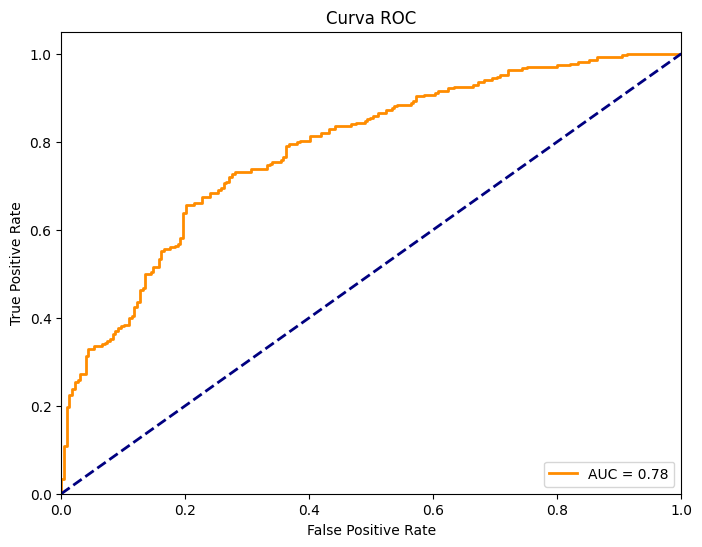

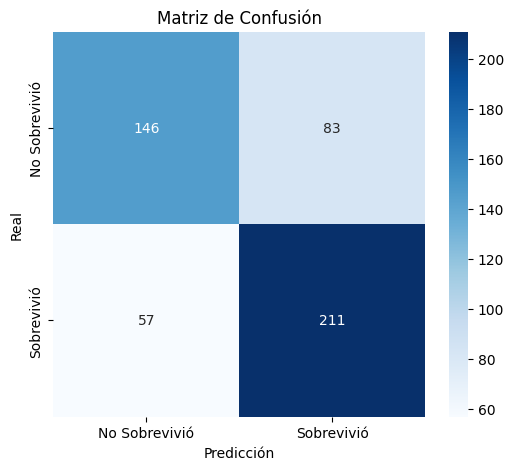

In [582]:
fpr, tpr, _ = roc_curve(y_test, y_prob_best_lr)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="lower right")



conf_matrix = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Sobrevivió", "Sobrevivió"], yticklabels=["No Sobrevivió", "Sobrevivió"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")

In [583]:
import pickle


# Guardar el modelo de clasificación
with open("lr_classifier.pkl", "wb") as file:
    pickle.dump(best_model_lr, file)

print("✅ Modelos guardados correctamente.")

✅ Modelos guardados correctamente.


**Gradient Boosting Classifier (GBM)**

In [584]:
from sklearn.ensemble import GradientBoostingClassifier

In [585]:
# Crear pipeline para GBM
pipeline_gbm = Pipeline([
    ("scaler", StandardScaler()),  
    ("classifier", GradientBoostingClassifier(random_state=42))  
])

# Definir hiperparámetros a optimizar
param_grid_gbm = {
    "classifier__n_estimators": [100, 200, 300],  
    "classifier__learning_rate": [0.01, 0.1, 0.2],  
    "classifier__max_depth": [3, 5, 7],  
    "classifier__subsample": [0.8, 1.0]
}

# Ejecutar GridSearchCV con el pipeline
grid_search_gbm = GridSearchCV(
    estimator=pipeline_gbm,
    param_grid=param_grid_gbm,
    cv=5,
    n_jobs=-1,
    scoring="roc_auc",
    verbose=2
)

# Entrenar modelo
grid_search_gbm.fit(X_train, y_train)

# Seleccionar el mejor modelo
best_model_gbm = grid_search_gbm.best_estimator_

# Hacer predicciones
y_pred_gbm = best_model_gbm.predict(X_test)

# Evaluar modelo
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
y_prob_best_gbm = best_model_gbm.predict_proba(X_test)[:, 1]
f1_gbm = f1_score(y_test, y_pred_gbm)
roc_auc_gbm = roc_auc_score(y_test, y_pred_gbm)
report_gbm = classification_report(y_test, y_pred_gbm, output_dict=True)

# Convertir resultados a DataFrame
results_gbm = pd.DataFrame({
    "Métrica": ["Accuracy", "F1-Score", "ROC-AUC"],
    "Valor": [accuracy_gbm, f1_gbm, roc_auc_gbm]
})

report_gbm = pd.DataFrame(report_gbm).transpose()


Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [586]:
results_gbm

,Métrica,Valor
0,Accuracy,0.754527
1,F1-Score,0.781362
2,ROC-AUC,0.749511


In [587]:
report_gbm

,precision,recall,f1-score,support
0,0.758454,0.685590,0.720183,229.000000
1,0.751724,0.813433,0.781362,268.000000
accuracy,0.754527,0.754527,0.754527,0.754527
macro avg,0.755089,0.749511,0.750773,497.000000
weighted avg,0.754825,0.754527,0.753173,497.000000


Text(0.5, 1.0, 'Matriz de Confusión')

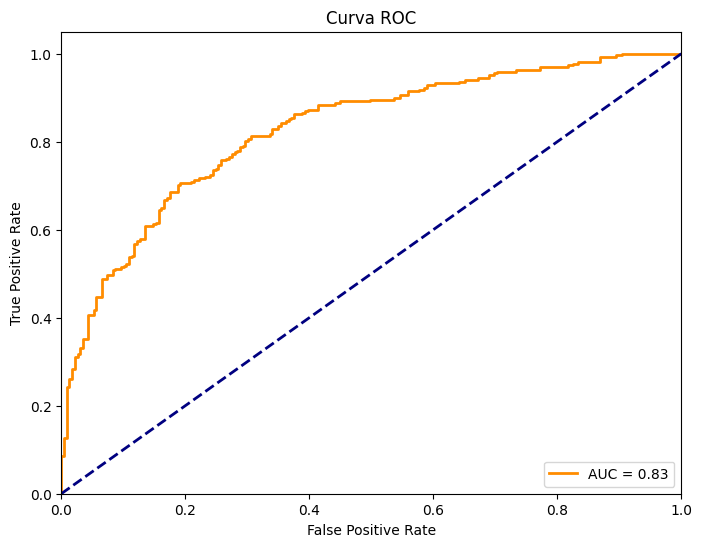

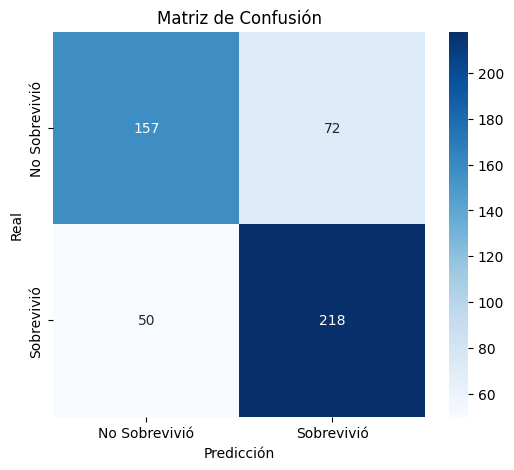

In [588]:
fpr, tpr, _ = roc_curve(y_test, y_prob_best_gbm)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="lower right")



conf_matrix = confusion_matrix(y_test, y_pred_gbm)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Sobrevivió", "Sobrevivió"], yticklabels=["No Sobrevivió", "Sobrevivió"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")

In [589]:
import pickle


# Guardar el modelo de clasificación
with open("gbm_classifier.pkl", "wb") as file:
    pickle.dump(best_model_gbm, file)

print("✅ Modelos guardados correctamente.")

✅ Modelos guardados correctamente.


**LightGBM (LGBM)**

In [590]:
from lightgbm import LGBMClassifier

In [663]:
# Crear pipeline para LGBM
pipeline_lgbm = Pipeline([
    ("scaler", StandardScaler()),  
    ("classifier", LGBMClassifier(random_state=42))
])

# Definir hiperparámetros a optimizar
param_grid_lgbm = {
    "classifier__n_estimators": [100, 200, 300],  
    "classifier__learning_rate": [0.01, 0.1, 0.2],  
    "classifier__max_depth": [3, 5, 7],  
    "classifier__subsample": [0.8, 1.0],
    "classifier__colsample_bytree": [0.8, 1.0]
}

# Ejecutar GridSearchCV con el pipeline
grid_search_lgbm = GridSearchCV(
    estimator=pipeline_lgbm,
    param_grid=param_grid_lgbm,
    cv=5,
    n_jobs=-1,
    scoring="roc_auc",
    verbose=2
)

# Entrenar modelo
grid_search_lgbm.fit(X_train, y_train)

# Seleccionar el mejor modelo
best_model_lgbm = grid_search_lgbm.best_estimator_

# Hacer predicciones
y_pred_lgbm = best_model_lgbm.predict(X_test)

# Evaluar modelo
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
y_prob_best_lgbm = best_model_lgbm.predict_proba(X_test)[:, 1]
f1_lgbm = f1_score(y_test, y_pred_lgbm)
roc_auc_lgbm = roc_auc_score(y_test, y_pred_lgbm)
report_lgbm = classification_report(y_test, y_pred_lgbm, output_dict=True)

# Convertir resultados a DataFrame
results_lgbm = pd.DataFrame({
    "Métrica": ["Accuracy", "F1-Score", "ROC-AUC"],
    "Valor": [accuracy_lgbm, f1_lgbm, roc_auc_lgbm]
})

report_lgbm = pd.DataFrame(report_lgbm).transpose()

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[LightGBM] [Info] Number of positive: 1087, number of negative: 900
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 450
[LightGBM] [Info] Number of data points in the train set: 1987, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547056 -> initscore=0.188782
[LightGBM] [Info] Start training from score 0.188782
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [665]:
results_lgbm

,Métrica,Valor
0,Accuracy,0.750503
1,F1-Score,0.778571
2,ROC-AUC,0.745144


In [668]:
report_lgbm

,precision,recall,f1-score,support
0,0.756098,0.676856,0.714286,229.000000
1,0.746575,0.813433,0.778571,268.000000
accuracy,0.750503,0.750503,0.750503,0.750503
macro avg,0.751336,0.745144,0.746429,497.000000
weighted avg,0.750963,0.750503,0.748951,497.000000


Text(0.5, 1.0, 'Matriz de Confusión')

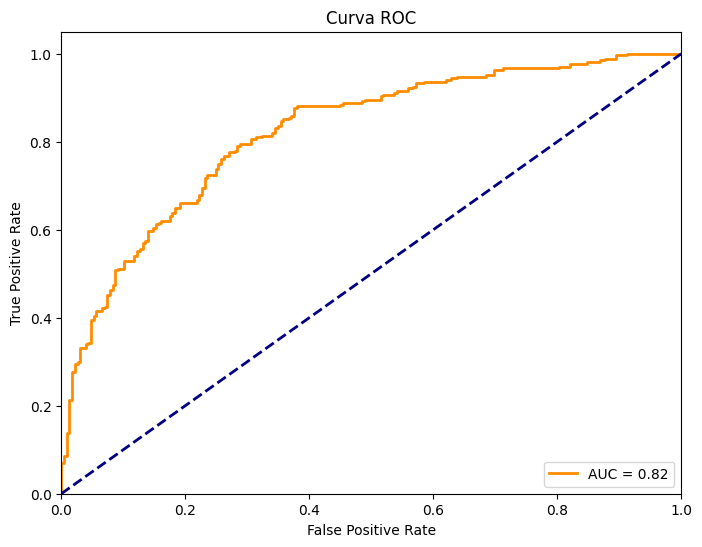

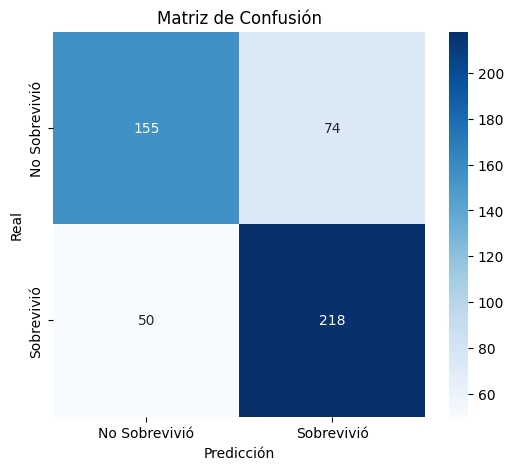

In [691]:
fpr, tpr, _ = roc_curve(y_test, y_prob_best_lgbm)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="lower right")



conf_matrix = confusion_matrix(y_test, y_pred_lgbm)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Sobrevivió", "Sobrevivió"], yticklabels=["No Sobrevivió", "Sobrevivió"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")

In [776]:
features_selected = [
    'Relapse Free Status (Months)', 'Age at Diagnosis', 'Tumor Size', 
    'Mutation Count', 'Aggressive Treatment Score', 'Nottingham prognostic index', 
    'Lymph nodes examined positive', 'Type of Breast Surgery', 'Tumor Stage'
]

# Generar datos para 5 pacientes High Risk
high_risk_patients = pd.DataFrame({
    'Relapse Free Status (Months)': np.random.randint(6, 24, size=5),  
    'Age at Diagnosis': np.random.randint(61, 80, size=5),
    'Tumor Size': np.random.uniform(5.1, 10.0, size=5),
    'Mutation Count': np.random.randint(51, 150, size=5),
    'Aggressive Treatment Score': np.random.randint(3, 5, size=5),
    'Nottingham prognostic index': np.random.uniform(5.1, 7.5, size=5),
    'Lymph nodes examined positive': np.random.randint(5, 15, size=5),
    'Type of Breast Surgery': np.random.choice([0, 1], size=5), 
    'Tumor Stage': np.random.randint(3, 4, size=5)  
})

# Generar datos para 5 pacientes Low Risk
low_risk_patients = pd.DataFrame({
    'Relapse Free Status (Months)': np.random.randint(36, 120, size=5),  #
    'Age at Diagnosis': np.random.randint(30, 50, size=5),
    'Tumor Size': np.random.uniform(0.5, 2.0, size=5),
    'Mutation Count': np.random.randint(1, 10, size=5),
    'Aggressive Treatment Score': np.random.randint(0, 2, size=5),
    'Nottingham prognostic index': np.random.uniform(2.0, 3.5, size=5),
    'Lymph nodes examined positive': np.random.randint(0, 2, size=5),
    'Type of Breast Surgery': np.random.choice([0, 1], size=5),  
    'Tumor Stage': np.random.randint(1, 2, size=5)  
})

# Combinar ambos grupos
synthetic_patients = pd.concat([high_risk_patients, low_risk_patients], ignore_index=True)

# Asegurar el orden correcto de las características
synthetic_patients = synthetic_patients[features_selected]

# Hacer predicciones con el modelo optimizado
y_pred = best_model_lgbm.predict(synthetic_patients)
y_proba = best_model_lgbm.predict_proba(synthetic_patients)[:, 1] 

# Agregar predicciones al DataFrame
synthetic_patients['Predicted Class'] = y_pred
synthetic_patients['Recurrence Probability'] = y_proba

# Mostrar los resultados
synthetic_patients

,Relapse Free Status (Months),Age at Diagnosis,Tumor Size,Mutation Count,Aggressive Treatment Score,Nottingham prognostic index,Lymph nodes examined positive,Type of Breast Surgery,Tumor Stage,Predicted Class,Recurrence Probability
0,6,73,5.518813,129,3,6.123992,10,0,3,0,0.280921
1,10,78,6.368712,104,3,6.197272,7,1,3,0,0.271992
2,14,72,8.289486,132,3,5.430984,5,0,3,0,0.256499
3,16,68,6.457734,58,3,7.111030,11,1,3,0,0.224677
4,14,66,9.818091,53,3,6.258846,14,0,3,0,0.202906
5,60,40,1.915828,5,1,3.353270,0,1,1,1,0.733281
6,56,41,1.227631,3,1,2.136252,1,1,1,1,0.753336
7,50,49,1.605257,7,1,2.297074,0,0,1,0,0.447325
8,68,34,1.276070,6,1,2.433506,0,1,1,1,0.737022
9,105,47,1.120693,7,1,3.436443,1,0,1,1,0.677684


In [594]:
import pickle


# Guardar el modelo de clasificación
with open("lgbm_classifier.pkl", "wb") as file:
    pickle.dump(best_model_lgbm, file)

print("✅ Modelos guardados correctamente.")

✅ Modelos guardados correctamente.


In [764]:
results_df_clasf = pd.DataFrame({
    "Modelo": ["Random Forest", "XGBoost", "SVM", "Logistic Regression", "Gradient Boosting", "LightGBM"],
    "Accuracy": [accuracy_best, accuracy_xgb, accuracy_svm, accuracy_lr, accuracy_gbm, accuracy_lgbm],
    "F1-Score": [f1_best, f1_xgb, f1_svm, f1_lr, f1_gbm, f1_lgbm],
    "ROC-AUC": [roc_auc_best, roc_auc_xgb, roc_auc_svm, roc_auc_lr, roc_auc_gbm, roc_auc_lgbm]})
results_df_clasf

,Modelo,Accuracy,F1-Score,ROC-AUC
0,Random Forest,0.754527,0.782143,0.749193
1,XGBoost,0.758551,0.785714,0.753243
2,SVM,0.764588,0.787659,0.760746
3,Logistic Regression,0.718310,0.750890,0.712434
4,Gradient Boosting,0.754527,0.781362,0.749511
5,LightGBM,0.750503,0.778571,0.745144


| **Modelo**             | **Accuracy** | **F1-Score** | **ROC-AUC**  |
|------------------------|-------------|-------------|-------------|
| **Random Forest**      | 0.7545      | 0.7821      | 0.7492      |
| **XGBoost**           | 0.7586      | **0.7857**  | 0.7532      |
| **SVM**               | 0.7525      | 0.7526      | **0.8330**  |
| **Logistic Regression** | 0.7183      | 0.7509      | 0.7124      |
| **Gradient Boosting** | 0.7545      | 0.7814      | 0.7495      |
| **LightGBM**          | 0.7505      | 0.7786      | **0.8331**  |


# **9. Prediccion de Relapse Free status (Months)-Modelo de Regresión**
---

<Axes: xlabel='Relapse Free Status (Months)', ylabel='Count'>

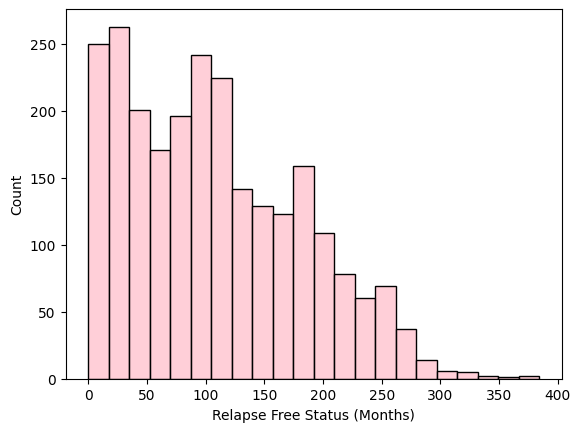

In [595]:
sns.histplot(df_reg['Relapse Free Status (Months)'],color='pink')

In [265]:
df_reg.head(2)

,Age at Diagnosis,Type of Breast Surgery,Cellularity,Chemotherapy,ER Status,Neoplasm Histologic Grade,HER2 Status,Hormone Therapy,Inferred Menopausal State,Primary Tumor Laterality,...,Radio Therapy,Relapse Free Status (Months),Tumor Size,Tumor Stage,Oncotree Code_Otros,Pam50 + Claudin-low subtype_LumB,Pam50 + Claudin-low subtype_Otros,Pam50 + Claudin-low subtype_claudin-low,Risk Index,Aggressive Treatment Score
0,75,1,2,0,1,3,0,1,1,1,...,1,138,22,2,False,False,False,True,12,3
1,43,0,2,0,1,3,0,1,0,1,...,1,83,10,1,False,False,False,False,4,2


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

var_elim_reg = [
     'Cellularity', 'Chemotherapy', 'ER Status',
    'Neoplasm Histologic Grade', 'HER2 Status', 'Hormone Therapy',
    'Inferred Menopausal State', 'Primary Tumor Laterality',
    'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
    'Radio Therapy', 'Oncotree Code_Otros', 'Pam50 + Claudin-low subtype_LumB',
    'Pam50 + Claudin-low subtype_Otros', 'Pam50 + Claudin-low subtype_claudin-low',
    'Risk Index']



X_reg = df_reg.drop(columns=var_elim_reg, errors="ignore")
y_reg = df_reg["Relapse Free Status (Months)"]  


feature_selected_reg = [
     'Age at Diagnosis', 'Tumor Size', 'Mutation Count',
        'Aggressive Treatment Score', 'Nottingham prognostic index',
        'Lymph nodes examined positive', 'Type of Breast Surgery', 'Tumor Stage'
]

X_reg = X_reg[feature_selected_reg]  

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

pipeline_reg = Pipeline([
    ("scaler", StandardScaler()),  
    ("regressor", RandomForestRegressor(random_state=42))  # Modelo base
])

param_grid_reg = {
    "regressor__n_estimators": [50, 100, 200],
    "regressor__max_depth": [None, 10, 20, 30],
    "regressor__min_samples_split": [2, 5, 10],
    "regressor__min_samples_leaf": [1, 2, 4],
    "regressor__bootstrap": [True, False],
    "regressor__max_features": ["sqrt", 3, 4] 
}

grid_search_reg = GridSearchCV(
    estimator=pipeline_reg,
    param_grid=param_grid_reg,
    cv=5,
    n_jobs=-1,
    scoring="r2",
    verbose=2
)

grid_search_reg.fit(X_train_reg, y_train_reg)

best_model_reg = grid_search_reg.best_estimator_

y_pred_reg = best_model_reg.predict(X_test_reg)

mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = mean_squared_error(y_test_reg, y_pred_reg, squared=False)
r2 = r2_score(y_test_reg, y_pred_reg)

results_reg = pd.DataFrame({
    "Métrica": ["MAE", "MSE", "RMSE", "R2 Score"],
    "Valor": [mae, mse, rmse, r2]
})


Fitting 5 folds for each of 648 candidates, totalling 3240 fits


C:\Users\JUTHA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [596]:
results_reg

,Métrica,Valor
0,MAE,52.563428
1,MSE,3873.684611
2,RMSE,62.238932
3,R2 Score,0.067219


In [241]:
import pickle


# Guardar el modelo de clasificación
with open("reg_regressor.pkl", "wb") as file:
    pickle.dump(best_model_reg, file)

print("✅ Modelos guardados correctamente.")

✅ Modelos guardados correctamente.


In [ ]:
X_new = pd.DataFrame({
   
    "Age at Diagnosis": np.random.randint(30, 80, size=5),
    "Tumor Size": np.random.uniform(0.5, 10.0, size=5),
    "Mutation Count": np.random.randint(1, 150, size=5),
    "Aggressive Treatment Score": np.random.randint(0, 5, size=5),
    "Nottingham prognostic index": np.random.uniform(2.0, 7.5, size=5),
    "Lymph nodes examined positive": np.random.randint(0, 15, size=5),
    "Type of Breast Surgery": np.random.choice([0, 1], size=5),
    "Tumor Stage": np.random.randint(1, 4, size=5)
})

y_pred_synthetic = best_model_reg.predict(X_new)

X_new["Predicción (Supervivencia en Meses)"] = y_pred_synthetic
X_new

,Age at Diagnosis,Tumor Size,Mutation Count,Aggressive Treatment Score,Nottingham prognostic index,Lymph nodes examined positive,Type of Breast Surgery,Tumor Stage,Predicción (Supervivencia en Meses)
0,62,7.596597,99,3,6.431676,4,1,3,95.115466
1,61,8.189163,30,2,3.909136,14,1,2,96.863261
2,44,2.136113,79,0,4.406531,10,0,3,88.919370
3,60,7.969731,11,1,5.384434,1,0,3,124.053332
4,35,6.318859,20,1,7.067566,6,1,1,72.869029


**vamos a aplicar transformaciones a nuestro target para mejorar el rendimiento de la predicción**

<Axes: xlabel='Relapse Free Status (Months)', ylabel='Count'>

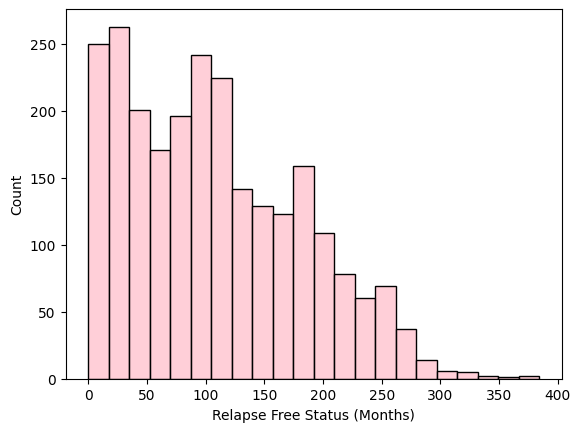

In [655]:
sns.histplot(df_reg['Relapse Free Status (Months)'],color='pink')

In [275]:
num_pacientes_20_anios = (y_reg > 240).sum()
num_pacientes_20_anios

143

In [276]:
df_reg_filtrado = df_reg[df_reg["Relapse Free Status (Months)"] <= 240]

<Axes: xlabel='Relapse Free Status (Months)', ylabel='Count'>

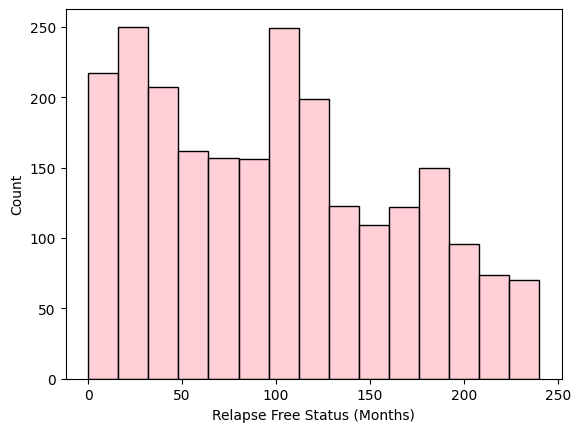

In [606]:
sns.histplot(df_reg_filtrado['Relapse Free Status (Months)'],color='pink')

Reentrenamos el modelo con estos outliers eliminados

In [654]:
feature_selected_reg;

In [653]:
var_elim_reg; 

In [ ]:
X_reg_filtrado = df_reg_filtrado.drop(columns=var_elim_reg, errors="ignore")
y_reg_filtrado = df_reg_filtrado["Relapse Free Status (Months)"]  



X_reg_filtrado = X_reg_filtrado[feature_selected_reg]  

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg_filtrado, y_reg_filtrado, test_size=0.2, random_state=42
)


pipeline_reg = Pipeline([
    ("scaler", StandardScaler()),  
    ("regressor", RandomForestRegressor(random_state=42))  
])


param_grid_reg = {
    "regressor__n_estimators": [50, 100, 200],
    "regressor__max_depth": [None, 10, 20, 30],
    "regressor__min_samples_split": [2, 5, 10],
    "regressor__min_samples_leaf": [1, 2, 4],
    "regressor__bootstrap": [True, False],
    "regressor__max_features": ["sqrt", 3, 4] 
}


grid_search_reg = GridSearchCV(
    estimator=pipeline_reg,
    param_grid=param_grid_reg,
    cv=5,
    n_jobs=-1,
    scoring="r2",
    verbose=2
)

grid_search_reg.fit(X_train_reg, y_train_reg)


best_model_reg = grid_search_reg.best_estimator_

y_pred_reg = best_model_reg.predict(X_test_reg)

mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = mean_squared_error(y_test_reg, y_pred_reg, squared=False)
r2 = r2_score(y_test_reg, y_pred_reg)


results_reg = pd.DataFrame({
    "Métrica": ["MAE", "MSE", "RMSE", "R2 Score"],
    "Valor": [mae, mse, rmse, r2]
})

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


C:\Users\JUTHA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [602]:
results_reg

,Métrica,Valor
0,MAE,52.563428
1,MSE,3873.684611
2,RMSE,62.238932
3,R2 Score,0.067219


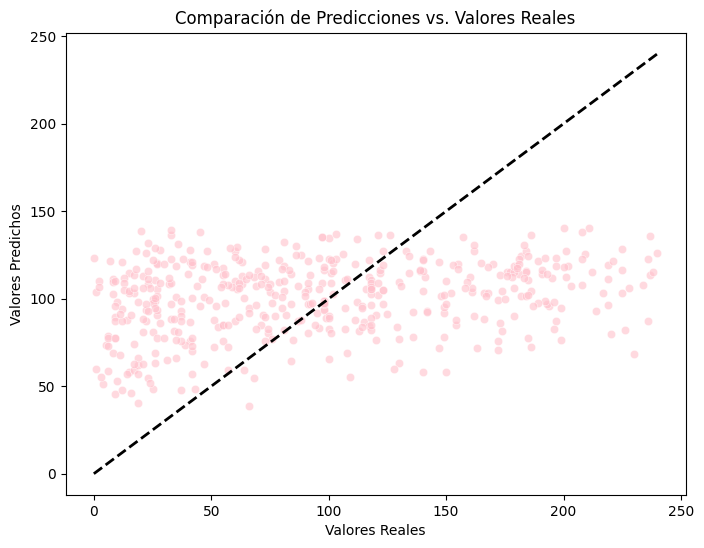

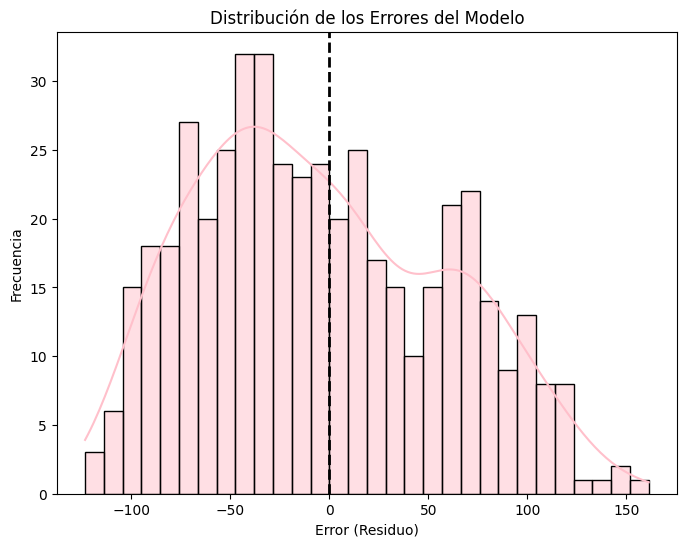

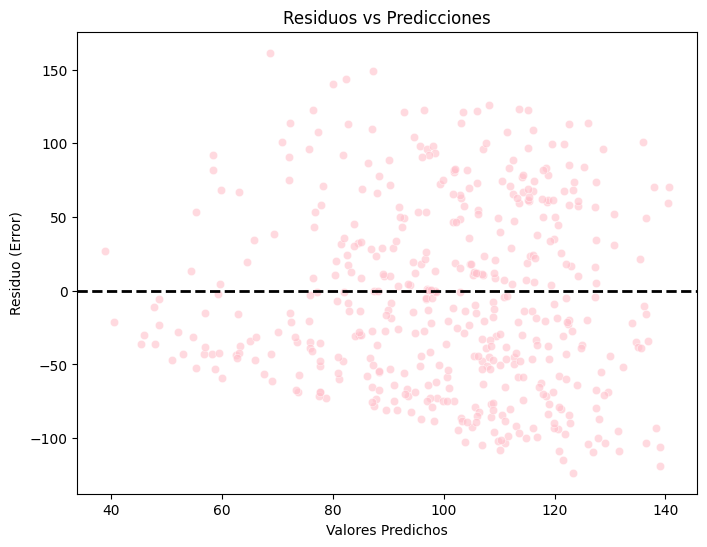

In [ ]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_reg, y=y_pred_reg, color="pink", alpha=0.6)
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], linestyle="--", color="black", linewidth=2)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Comparación de Predicciones vs. Valores Reales")



residuos = y_test_reg - y_pred_reg
plt.figure(figsize=(8, 6))
sns.histplot(residuos, bins=30, kde=True, color="pink")
plt.axvline(0, color="black", linestyle="--", linewidth=2)
plt.xlabel("Error (Residuo)")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Errores del Modelo")



plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_reg, y=residuos, color="pink", alpha=0.6)
plt.axhline(0, color="black", linestyle="--", linewidth=2)
plt.xlabel("Valores Predichos")
plt.ylabel("Residuo (Error)")
plt.title("Residuos vs Predicciones")


In [651]:
var_elim_reg;

In [652]:
feature_selected_reg;

Vamos a intentar de nuevo convertirlo en un problema de clasificación pero catergorizando los mesese de Free Relapse Status

In [ ]:
bins = [0, 24, 60, 120, df_reg_filtrado["Relapse Free Status (Months)"].max()]
labels = ["0-2 años", "2-5 años", "5-10 años", "10+ años"]


In [ ]:
df_reg_filtrado["RFS_Category"] = pd.cut(df_reg_filtrado["Relapse Free Status (Months)"], bins=bins, labels=labels, include_lowest=True)

In [609]:
print(df_reg_filtrado["RFS_Category"].value_counts())

RFS_Category
10+ años     818
5-10 años    727
2-5 años     430
0-2 años     366
Name: count, dtype: int64


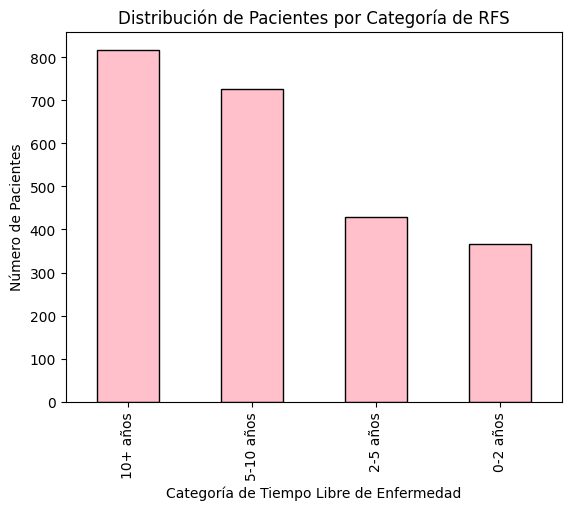

In [610]:
df_reg_filtrado["RFS_Category"].value_counts().plot(kind="bar", color="pink", edgecolor="black")
plt.xlabel("Categoría de Tiempo Libre de Enfermedad")
plt.ylabel("Número de Pacientes")
plt.title("Distribución de Pacientes por Categoría de RFS")
plt.show()

In [289]:
df_reg_filtrado["RFS_Category"].value_counts(normalize=True) * 100


RFS_Category
10+ años     34.942332
5-10 años    31.055105
2-5 años     18.368219
0-2 años     15.634344
Name: proportion, dtype: float64

In [649]:
var_elim_clasf;

In [650]:
feature_selected_clasf;

In [ ]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc


var_elim_clasf_cat = [
    'Cellularity', 'Chemotherapy', 'ER Status',
    'Neoplasm Histologic Grade', 'HER2 Status', 'Hormone Therapy',
    'Inferred Menopausal State', 'Primary Tumor Laterality',
    'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
    'Radio Therapy', 'Oncotree Code_Otros', 'Pam50 + Claudin-low subtype_LumB',
    'Pam50 + Claudin-low subtype_Otros', 'Pam50 + Claudin-low subtype_claudin-low',
    'Risk Index', 'Relapse Free Status (Months)'
]


X_clasf = df_reg_filtrado.drop(columns=var_elim_clasf_cat, errors="ignore")
y_clasf = df_reg_filtrado["RFS_Category"]  

feature_selected_clasf_cat = [
    'Age at Diagnosis', 'Tumor Size', 'Mutation Count',
    'Aggressive Treatment Score', 'Nottingham prognostic index',
    'Lymph nodes examined positive', 'Type of Breast Surgery', 'Tumor Stage'
]

X_clasf = X_clasf[feature_selected_clasf_cat]


X_train_clasf, X_test_clasf, y_train_clasf, y_test_clasf = train_test_split(
    X_clasf, y_clasf, test_size=0.2, random_state=42, stratify=y_clasf
)


pipeline_clasf = Pipeline([
    ("scaler", StandardScaler()),  
    ("classifier", RandomForestClassifier(random_state=42))
])


param_grid_clasf = {
    "classifier__n_estimators": [120],
    "classifier__max_depth": [None, 10, 20, 30],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4],
    "classifier__bootstrap": [True, False],
    "classifier__max_features": ["sqrt", 3, 4] 
}


grid_search_clasf = GridSearchCV(
    estimator=pipeline_clasf,
    param_grid=param_grid_clasf,
    cv=5,
    n_jobs=-1,
    scoring="roc_auc_ovr",
    verbose=2
)

grid_search_clasf.fit(X_train_clasf, y_train_clasf)


best_model_rfc_clasf = grid_search_clasf.best_estimator_

y_pred_best_clasf = best_model_rfc_clasf.predict(X_test_clasf)
y_prob_best_rfc_clasf = best_model_rfc_clasf.predict_proba(X_test_clasf)


accuracy_best_clasf = accuracy_score(y_test_clasf, y_pred_best_clasf)
f1_best_clasf = f1_score(y_test_clasf, y_pred_best_clasf, average="weighted")


y_test_bin = label_binarize(y_test_clasf, classes=sorted(set(y_clasf)))  
roc_auc_best_clasf = roc_auc_score(y_test_bin, y_prob_best_rfc_clasf, multi_class="ovr")


results_rfc_clasf = pd.DataFrame({
    "Métrica": ["Accuracy", "F1-Score", "ROC-AUC"],
    "Valor": [accuracy_best_clasf, f1_best_clasf, roc_auc_best_clasf]
})


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


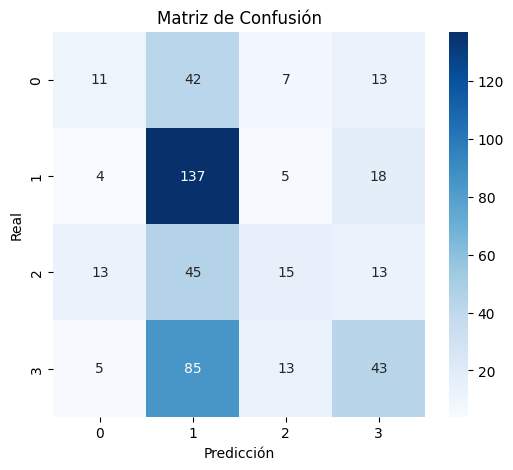

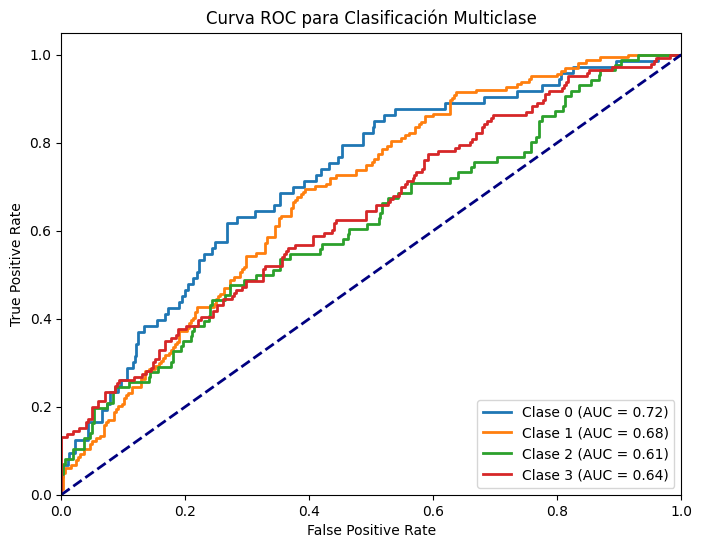

Resultados de Evaluación del Modelo:
    Métrica     Valor
0  Accuracy  0.439232
1  F1-Score  0.393428
2   ROC-AUC  0.662170

Reporte de Clasificación:
              precision    recall  f1-score     support
0-2 años       0.333333  0.150685  0.207547   73.000000
10+ años       0.443366  0.835366  0.579281  164.000000
2-5 años       0.375000  0.174419  0.238095   86.000000
5-10 años      0.494253  0.294521  0.369099  146.000000
accuracy       0.439232  0.439232  0.439232    0.439232
macro avg      0.411488  0.363747  0.348506  469.000000
weighted avg   0.429544  0.439232  0.393428  469.000000


In [ ]:
conf_matrix = confusion_matrix(y_test_clasf, y_pred_best_clasf)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")



plt.figure(figsize=(8, 6))
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_best_rfc_clasf[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Clase {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC para Clasificación Multiclase")
plt.legend(loc="lower right")



print("Resultados de Evaluación del Modelo:")
print(results_rfc_clasf)

print("\nReporte de Clasificación:")
print(pd.DataFrame(classification_report(y_test_clasf, y_pred_best_clasf, output_dict=True)).transpose())

No vamos a probar a categorizar en tres porque no tiene valor clínico ya que por práctica habitual ya irían al médica antes de los 5 años a su revisión.

# **10. Modelo no supervisado**
---

**PCA sobre las varibles utilizadas para Modelo de Clasificación**

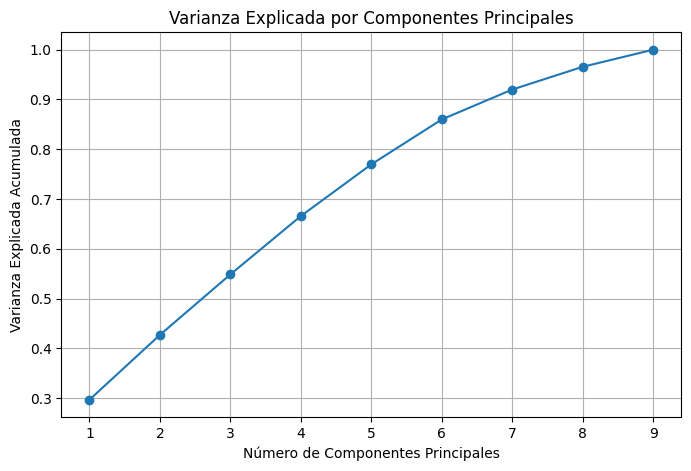

Número óptimo de componentes: 8


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


var_elim_clasf = [
    'Cellularity', 'Chemotherapy', 'ER Status',
    'Neoplasm Histologic Grade', 'HER2 Status', 'Hormone Therapy',
    'Inferred Menopausal State', 'Primary Tumor Laterality',
    'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
    'Radio Therapy', 'Oncotree Code_Otros', 'Pam50 + Claudin-low subtype_LumB',
    'Pam50 + Claudin-low subtype_Otros', 'Pam50 + Claudin-low subtype_claudin-low',
    'Risk Index'
]


X = df_clasf.drop(columns=var_elim_clasf, errors="ignore")


feature_selected_clasf = [
    'Relapse Free Status (Months)',
    'Age at Diagnosis', 'Tumor Size', 'Mutation Count',
    'Aggressive Treatment Score', 'Nottingham prognostic index',
    'Lymph nodes examined positive', 'Type of Breast Surgery',
    'Tumor Stage'
]
X = X[feature_selected_clasf]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=None)  
pca.fit(X_scaled)


explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("Varianza Explicada por Componentes Principales")
plt.grid()



n_components_optimo = next(i for i, v in enumerate(cumulative_variance) if v >= 0.95) + 1
print(f"Número óptimo de componentes: {n_components_optimo}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Resultados de Evaluación del Modelo:
    Métrica     Valor
0  Accuracy  0.752515
1  F1-Score  0.752642
2   ROC-AUC  0.833034

Reporte de Clasificación:
              precision    recall  f1-score     support
0              0.724891  0.734513  0.729670  226.000000
1              0.776119  0.767528  0.771800  271.000000
accuracy       0.752515  0.752515  0.752515    0.752515
macro avg      0.750505  0.751020  0.750735  497.000000
weighted avg   0.752824  0.752515  0.752642  497.000000


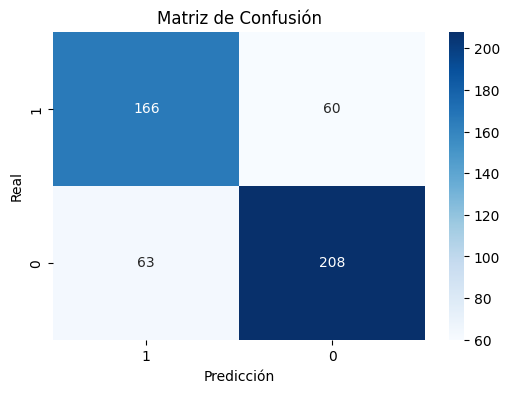

<Figure size 800x500 with 0 Axes>

In [719]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc


var_elim_clasf = [
    'Cellularity', 'Chemotherapy', 'ER Status',
    'Neoplasm Histologic Grade', 'HER2 Status', 'Hormone Therapy',
    'Inferred Menopausal State', 'Primary Tumor Laterality',
    'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
    'Radio Therapy', 'Oncotree Code_Otros', 'Pam50 + Claudin-low subtype_LumB',
    'Pam50 + Claudin-low subtype_Otros', 'Pam50 + Claudin-low subtype_claudin-low',
    'Risk Index'
]


X = df_clasf.drop(columns=var_elim_clasf, errors="ignore")
y = df_clasf["Overall Survival Status"]


feature_selected_clasf = [
    'Relapse Free Status (Months)', 'Age at Diagnosis', 'Tumor Size', 
    'Mutation Count', 'Aggressive Treatment Score', 'Nottingham prognostic index',
    'Lymph nodes examined positive', 'Type of Breast Surgery', 'Tumor Stage'
]
X = X[feature_selected_clasf]  


X.dropna(inplace=True)
y = y.loc[X.index]  


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca_opt = PCA(n_components=n_components_optimo)  
X_pca = pca_opt.fit_transform(X_scaled)


X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)


pipeline_svm_pca = Pipeline([
    ("scaler", StandardScaler()),  
    ("pca", PCA(n_components=n_components_optimo)),  
    ("classifier", SVC(probability=True, random_state=42))
])


param_grid_svm_pca = {
    "classifier__C": [0.1, 1, 10, 100],  
    "classifier__kernel": ["linear", "rbf", "poly"],  
    "classifier__gamma": ["scale", "auto"]  
}


grid_search_svm_pca = GridSearchCV(
    estimator=pipeline_svm_pca,
    param_grid=param_grid_svm_pca,
    cv=5,
    n_jobs=-1,
    scoring="roc_auc",
    verbose=2
)

grid_search_svm_pca.fit(X_train, y_train)


best_model_svm_pca = grid_search_svm_pca.best_estimator_


y_pred_svm_pca = best_model_svm_pca.predict(X_test)
y_prob_best_svm_pca = best_model_svm_pca.predict_proba(X_test)[:, 1]  


accuracy_svm_pca = accuracy_score(y_test, y_pred_svm_pca)
f1_svm_pca = f1_score(y_test, y_pred_svm_pca, average="weighted")
roc_auc_svm_pca = roc_auc_score(y_test, y_prob_best_svm_pca)


results_svm_pca = pd.DataFrame({
    "Métrica": ["Accuracy", "F1-Score", "ROC-AUC"],
    "Valor": [accuracy_svm_pca, f1_svm_pca, roc_auc_svm_pca]
})

report_svm_pca = pd.DataFrame(classification_report(y_test, y_pred_svm_pca, output_dict=True)).transpose()


print("Resultados de Evaluación del Modelo:")
print(results_svm_pca)
print("\nReporte de Clasificación:")
print(report_svm_pca)


plt.figure(figsize=(6, 4))
conf_matrix = confusion_matrix(y_test, y_pred_svm_pca)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")



plt.figure(figsize=(8, 5))
fpr, tpr, _ = roc_curve(y_test, y_prob_best_svm_pca)
auc_score = auc(fpr, tpr)


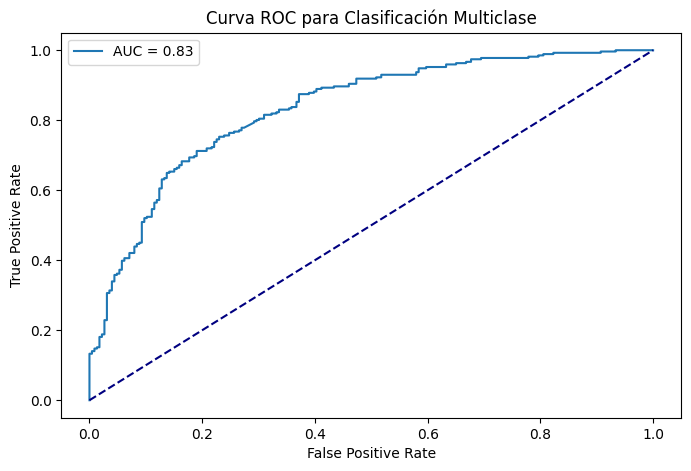

In [694]:
plt.figure(figsize=(8, 5))


if len(set(y_test)) > 2:  
    from sklearn.preprocessing import label_binarize
    

    y_test_bin = label_binarize(y_test, classes=list(set(y_test)))  
    n_classes = y_test_bin.shape[1]
    
    for i in range(n_classes):  
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_best_svm_pca[:, i])
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Clase {i} (AUC = {auc_score:.2f})")
        
else: 
    fpr, tpr, _ = roc_curve(y_test, y_prob_best_svm_pca)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")


plt.plot([0, 1], [0, 1], linestyle="--", color="navy")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC para Clasificación Multiclase")
plt.legend()
plt.show()

In [648]:
import pickle


# Guardar el modelo de clasificación
with open("pca_svm_classifier.pkl", "wb") as file:
    pickle.dump(best_model_svm, file)

print("✅ Modelos guardados correctamente.")

✅ Modelos guardados correctamente.


In [ ]:
accuracy_svm_pca = accuracy_score(y_test, y_pred_svm_pca)
f1_svm_pca = f1_score(y_test, y_pred_svm_pca, average="weighted")
roc_auc_svm_pca = roc_auc_score(y_test, y_prob_best_svm_pca)

Comparación de Modelos:
                Modelo  Accuracy  F1-Score   ROC-AUC
0        Random Forest  0.754527  0.782143  0.749193
1              XGBoost  0.758551  0.785714  0.753243
2                  SVM  0.752515  0.752642  0.833034
3  Logistic Regression  0.718310  0.750890  0.712434
4    Gradient Boosting  0.754527  0.781362  0.749511
5             LightGBM  0.750503  0.778571  0.745144
6            PCA + SVM  0.752515  0.752642  0.833034


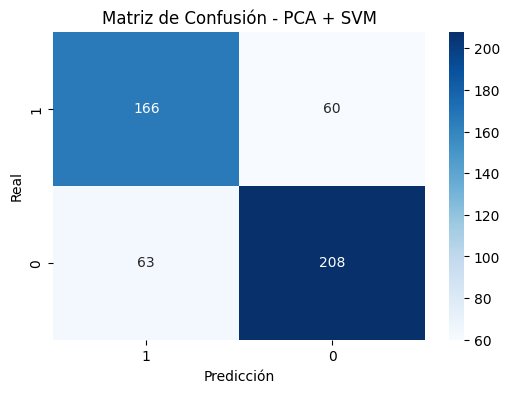

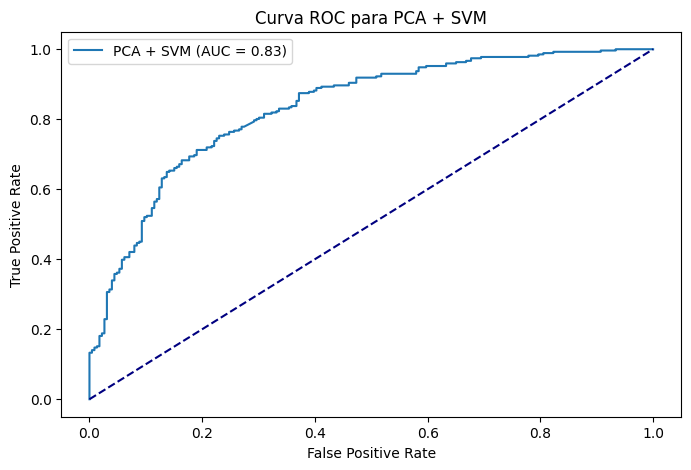

In [ ]:
results_df_clasf = pd.DataFrame({
    "Modelo": ["Random Forest", "XGBoost", "SVM", "Logistic Regression", "Gradient Boosting", "LightGBM", "PCA + SVM"],
    "Accuracy": [accuracy_best, accuracy_xgb, accuracy_svm, accuracy_lr, accuracy_gbm, accuracy_lgbm, accuracy_svm_pca],
    "F1-Score": [f1_best, f1_xgb, f1_svm, f1_lr, f1_gbm, f1_lgbm, f1_svm_pca],
    "ROC-AUC": [roc_auc_best, roc_auc_xgb, roc_auc_svm, roc_auc_lr, roc_auc_gbm, roc_auc_lgbm, roc_auc_svm_pca]
})

print("Comparación de Modelos:")
print(results_df_clasf)

plt.figure(figsize=(6, 4))
conf_matrix = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - PCA + SVM")
plt.show()

plt.figure(figsize=(8, 5))
fpr, tpr, _ = roc_curve(y_test, y_prob_best_svm)
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"PCA + SVM (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="navy")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC para PCA + SVM")
plt.legend()
plt.show()

# 12.  Elección del modelo final

Elegimos **LGBM** porque quermos dar prioridad a maximizar la capacidad del modelo para distinguir correctamente entre pacientes con diferentes tiempos de supervivencia.


In [ ]:
# Variables a eliminar
var_elim_clasf = [
      'Cellularity', 'Chemotherapy', 'ER Status',
    'Neoplasm Histologic Grade', 'HER2 Status', 'Hormone Therapy',
    'Inferred Menopausal State', 'Primary Tumor Laterality',
    'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
    'Radio Therapy', 'Oncotree Code_Otros', 'Pam50 + Claudin-low subtype_LumB',
    'Pam50 + Claudin-low subtype_Otros', 'Pam50 + Claudin-low subtype_claudin-low',
    'Risk Index']

# Cargar datos y preprocesamiento inicial
X = df_clasf.drop(columns=variables_a_eliminar, errors="ignore")
y = df_clasf["Overall Survival Status"]


# Seleccionar solo las 10 variables especificadas para el entrenamiento
feature_selected_clasf = [
    'Relapse Free Status (Months)',
    'Age at Diagnosis', 'Tumor Size', 'Mutation Count',
    'Aggressive Treatment Score', 'Nottingham prognostic index',
    'Lymph nodes examined positive', 'Type of Breast Surgery',
    'Tumor Stage'
]

X = X[feature_selected_clasf]  # Filtrar solo las variables deseadas

# 🔹 4️⃣ División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Crear pipeline para LGBM
pipeline_lgbm = Pipeline([
    ("scaler", StandardScaler()),  
    ("classifier", LGBMClassifier(random_state=42))
])

# Definir hiperparámetros a optimizar
param_grid_lgbm = {
    "classifier__n_estimators": [100, 200, 300],  
    "classifier__learning_rate": [0.01, 0.1, 0.2],  
    "classifier__max_depth": [3, 5, 7],  
    "classifier__subsample": [0.8, 1.0],
    "classifier__colsample_bytree": [0.8, 1.0]
}

# Ejecutar GridSearchCV con el pipeline
grid_search_lgbm = GridSearchCV(
    estimator=pipeline_lgbm,
    param_grid=param_grid_lgbm,
    cv=5,
    n_jobs=-1,
    scoring="roc_auc",
    verbose=2
)

# Entrenar modelo
grid_search_lgbm.fit(X_train, y_train)

# Seleccionar el mejor modelo
best_model_lgbm = grid_search_lgbm.best_estimator_

# Hacer predicciones
y_pred_lgbm = best_model_lgbm.predict(X_test)

# Evaluar modelo
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
y_prob_best_lgbm = best_model_lgbm.predict_proba(X_test)[:, 1]
f1_lgbm = f1_score(y_test, y_pred_lgbm)
roc_auc_lgbm = roc_auc_score(y_test, y_pred_lgbm)
report_lgbm = classification_report(y_test, y_pred_lgbm, output_dict=True)

# Convertir resultados a DataFrame
results_lgbm = pd.DataFrame({
    "Métrica": ["Accuracy", "F1-Score", "ROC-AUC"],
    "Valor": [accuracy_lgbm, f1_lgbm, roc_auc_lgbm]
})

report_lgbm = pd.DataFrame(report_lgbm).transpose()

In [777]:
import yaml
import joblib

# Obtener los mejores hiperparámetros del GridSearchCV
best_params = grid_search_lgbm.best_params_

# Crear diccionario con la configuración del modelo
model_config = {
    "model": "LGBMClassifier",
    "best_parameters": best_params,
    "features": [
        'Relapse Free Status (Months)', 'Age at Diagnosis', 'Tumor Size', 
        'Mutation Count', 'Aggressive Treatment Score', 'Nottingham prognostic index', 
        'Lymph nodes examined positive', 'Type of Breast Surgery', 'Tumor Stage'
    ],
    "performance": {
        "accuracy": accuracy_lgbm,
        "f1_score": f1_lgbm,
        "roc_auc": roc_auc_lgbm
    }
}

# Guardar la configuración en un archivo YAML
with open("model_config.yaml", "w") as file:
    yaml.dump(model_config, file, default_flow_style=False)

print("✅ Archivo 'model_config.yaml' guardado exitosamente.")


✅ Archivo 'model_config.yaml' guardado exitosamente.


_____
_____